# Keras API Project Exercise - Solutions
The Data
We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Our Goal
Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

Data Overview

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv('C:/Users/Apple/Desktop/tensorflow/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [118]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [119]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [121]:
sub_grade_order = sorted(df['sub_grade'].unique())

C:\Users\Apple\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

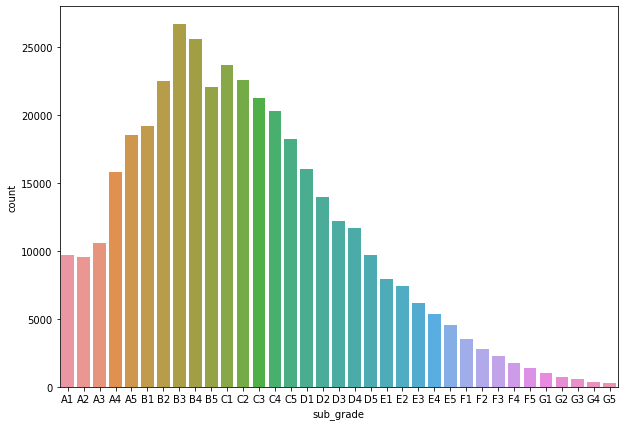

In [122]:
plt.figure(figsize=(10,7))
sns.countplot('sub_grade', data=df, order=sub_grade_order)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

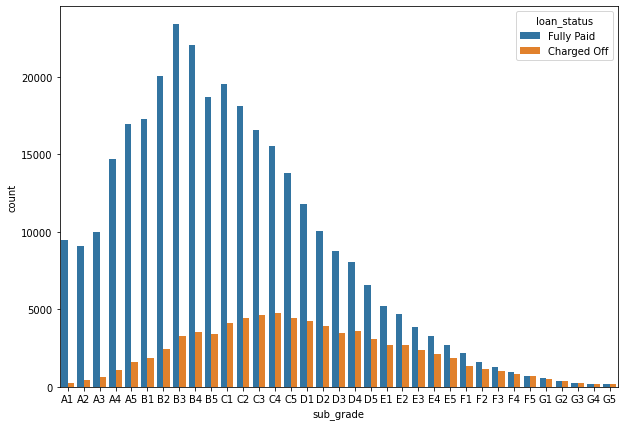

In [123]:
plt.figure(figsize=(10,7))
sns.countplot(x='sub_grade', data=df, order=sub_grade_order, hue='loan_status')

# looks like loan grade F and G didnt get paid back often

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

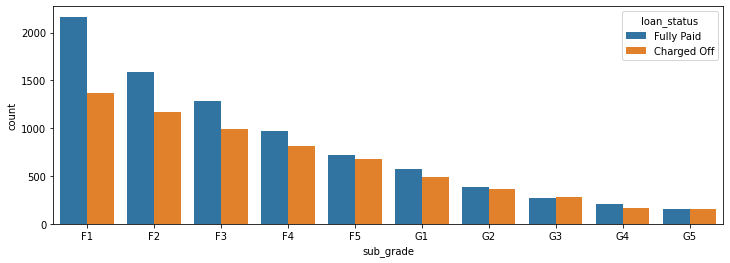

In [124]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
sub_grade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = sub_grade_order,hue='loan_status')

Text(0, 0.5, 'loan amount')

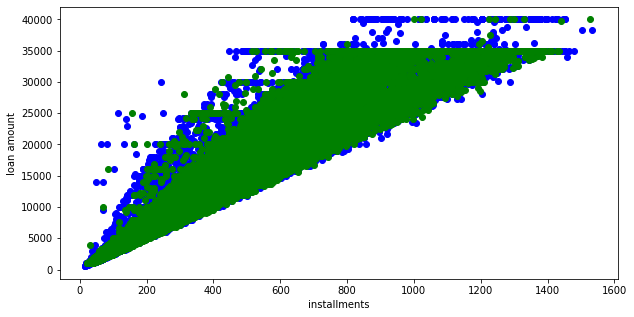

In [125]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df[df['loan_status']=='Fully Paid']['installment'], df[df['loan_status']=='Fully Paid']['loan_amnt'], c='blue')
ax.scatter(df[df['loan_status']=='Charged Off']['installment'], df[df['loan_status']=='Charged Off']['loan_amnt'], c='green')

ax.set_xlabel("installments")
ax.set_ylabel("loan amount")


Text(0, 0.5, 'pub_rec')

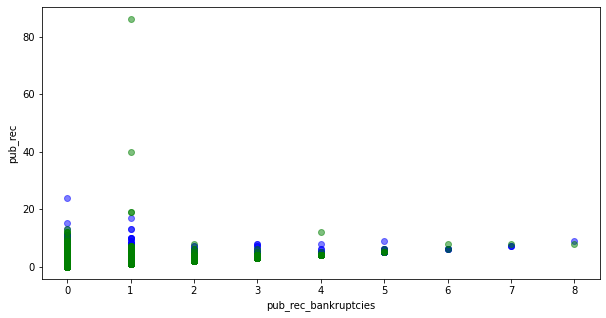

In [126]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["loan_status"]=='Fully Paid']["pub_rec_bankruptcies"], df[df["loan_status"]=='Fully Paid']["pub_rec"], c="blue", alpha=0.5)
ax.scatter(df[df["loan_status"]=='Charged Off']["pub_rec_bankruptcies"], df[df["loan_status"]=='Charged Off']["pub_rec"], c="green", alpha=0.5)

ax.set_xlabel("pub_rec_bankruptcies")
ax.set_ylabel("pub_rec")


In [127]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [128]:
len(df)

396030

In [129]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [130]:
df['emp_title'].value_counts()

Teacher                                4389
Manager                                4250
Registered Nurse                       1856
RN                                     1846
Supervisor                             1830
                                       ... 
SGA                                       1
AFS Financial                             1
Builders Exchange of Lansing              1
Spokane Eye Clinic                        1
County of San Bernardino Dept of BH       1
Name: emp_title, Length: 173105, dtype: int64

In [131]:
df = df.drop('emp_title', axis=1)

In [132]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [133]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [134]:
df = df.drop('emp_length', axis=1)

In [135]:
df['title'].unique

<bound method Series.unique of 0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object>

In [136]:
df = df.drop('title', axis=1)

In [137]:
df['purpose'].unique

<bound method Series.unique of 0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object>

In [138]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [139]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [140]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [141]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

In [142]:
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

# lets fill in missing data

In [143]:
def fill_mort_acc(total_acc, mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [144]:
df['mort_acc'] = df.apply(lambda x : fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)
# df1['year'] = df1['date'].apply(lambda date : date.year)

In [145]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

In [146]:
df['revol_util'].value_counts()

0.00      2213
53.00      752
60.00      739
61.00      734
55.00      730
          ... 
36.94        1
13.56        1
94.46        1
2.64         1
118.20       1
Name: revol_util, Length: 1226, dtype: int64

In [147]:
df.corr()['revol_util'].sort_values()

open_acc               -0.131420
total_acc              -0.104273
pub_rec_bankruptcies   -0.086751
pub_rec                -0.075910
mort_acc                0.005821
annual_inc              0.027871
dti                     0.088375
loan_amnt               0.099911
installment             0.123915
revol_bal               0.226346
int_rate                0.293659
revol_util              1.000000
Name: revol_util, dtype: float64

In [148]:
int_rate_avg = df.groupby('int_rate')['revol_util'].mean()

In [149]:
int_rate_avg

int_rate
5.32     26.406598
5.42     20.692258
5.79     21.628829
5.93     29.977030
5.99     19.533094
           ...    
30.79    49.433333
30.84     0.000000
30.89    47.366667
30.94    53.400000
30.99    55.923077
Name: revol_util, Length: 566, dtype: float64

In [150]:
def fill_revol_util(int_rate, revol_util):
    '''
    Accepts the int_acc and revol_util values for the row.
    Checks if the revol_util is NaN , if so, it returns the avg int_rate value
    for the corresponding int_rate value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(revol_util):
        return int_rate_avg[int_rate]
    else:
        return revol_util

In [151]:
df['revol_util'] = df.apply(lambda x : fill_revol_util(x['int_rate'], x['revol_util']), axis=1)

In [152]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

In [153]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [154]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

In [155]:
df.corr()['pub_rec_bankruptcies'].sort_values()

revol_bal              -0.124532
loan_amnt              -0.106539
installment            -0.098628
revol_util             -0.086783
annual_inc             -0.050162
open_acc               -0.027732
dti                    -0.014558
mort_acc                0.029276
total_acc               0.042035
int_rate                0.057450
pub_rec                 0.699408
pub_rec_bankruptcies    1.000000
Name: pub_rec_bankruptcies, dtype: float64

In [156]:
pub_rec_avg = df.groupby('pub_rec')['pub_rec_bankruptcies'].mean()

In [157]:
pub_rec_avg

pub_rec
0.0     0.000000
1.0     0.810205
2.0     0.929863
3.0     1.074293
4.0     1.136622
5.0     1.113924
6.0     0.983607
7.0     0.821429
8.0     1.235294
9.0     1.250000
10.0    0.363636
11.0    0.000000
12.0    1.000000
13.0    0.500000
15.0    0.000000
17.0    1.000000
19.0    1.000000
24.0    0.000000
40.0    1.000000
86.0    1.000000
Name: pub_rec_bankruptcies, dtype: float64

In [158]:
 def fill_rec_bankruptcies(pub_rec, pub_rec_bankruptcies):
    '''
    Accepts the int_acc and revol_util values for the row.
    Checks if the revol_util is NaN , if so, it returns the avg int_rate value
    for the corresponding int_rate value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(pub_rec_bankruptcies):
        return pub_rec_avg[pub_rec]
    else:
        return pub_rec_bankruptcies

In [159]:
df['pub_rec_bankruptcies'] = df.apply(lambda x : fill_rec_bankruptcies(x['pub_rec'], x['pub_rec_bankruptcies']), axis=1)

In [160]:
df = df.dropna()

In [161]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [162]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [163]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [164]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [165]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

# lets categorize our target into a categorical variable

In [166]:
df['loan_repaid']= df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [167]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [168]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [169]:
# or we use to change loan status to binary

In [170]:
# df['loan_repaid1'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [171]:
# df[['loan_repaid1', 'loan_status']]

In [172]:
df = df.drop('loan_status', axis=1)

<AxesSubplot:>

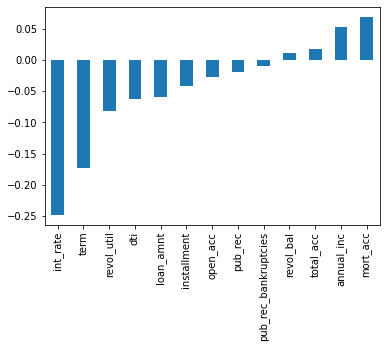

In [173]:
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')

# lets create dummy variables for all categorical variable

In [174]:
# lets select columns with string ie objects

In [175]:
df.select_dtypes(['object']).columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [176]:
# lets check out term

In [177]:
# df['term'].value_counts()

In [178]:
# df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [179]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid'],
      dtype='object')

In [180]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [181]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [182]:
df = df.drop('grade', axis=1)

In [183]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [184]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df.drop('sub_grade', axis=1), dummies], axis=1)

In [185]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [186]:
# since we have majority of the category under mortage, rent, own, 
# lets put in None and Any under Other so we dont create many un-necessary columns 
# then create dummy variables

In [187]:
df['home_ownership']= df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [188]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [189]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership', axis=1), dummies], axis=1)

In [190]:
dummies = pd.get_dummies(df[['verification_status','purpose', 'application_type', 'initial_list_status']], drop_first=True)
df = pd.concat([df.drop(['verification_status','purpose', 'application_type', 'initial_list_status'], axis=1), dummies], axis=1)

In [191]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,26.24,Jun-1990,16.0,0.0,...,0,0,0,0,0,1,0,1,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,22.05,Jul-2004,17.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,12.79,Aug-2007,13.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,2.60,Sep-2006,6.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,33.95,Mar-1999,13.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [192]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [193]:
# lets extract zipcode from the address column
df['zip_code'] = df['address'].apply(lambda address:address[-5])
df['zip_code'].value_counts()

2    101998
0     91226
7     56985
3     56546
4     55917
1     11226
9     11151
8     10981
Name: zip_code, dtype: int64

In [194]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)
df = pd.concat([df.drop('zip_code', axis=1), dummies], axis=1)


In [195]:
df = df.drop('address', axis=1)

In [196]:
df = df.drop('issue_d', axis=1)

In [197]:
df['earliest_cr_line'].sort_values()

20098     Apr-1955
319191    Apr-1955
278364    Apr-1958
185251    Apr-1960
139098    Apr-1961
            ...   
99356     Sep-2012
203813    Sep-2012
293529    Sep-2013
199237    Sep-2013
37775     Sep-2013
Name: earliest_cr_line, Length: 396030, dtype: object

In [198]:
# now lets extract the year column and convert it to integer since its an object
df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 396030, dtype: int64

In [199]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [200]:
df = df.drop('earliest_cr_line', axis=1)

In [201]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,application_type_JOINT,initial_list_status_w,1,2,3,4,7,8,9,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,1,0,1,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,0,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,0,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,0,1,0,0,0,0,0,0,1999


In [202]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [203]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w', '1', '2', '3', '4',
       '7', '8', '9', 'earliest

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X = df.drop('loan_repaid', axis=1).values

In [206]:
y = df['loan_repaid'].values

In [207]:
print(len(df))

396030


In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [209]:
from sklearn.preprocessing import MinMaxScaler

In [210]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [211]:
X_test_scaled = scaler.transform(X_test)

In [212]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard 
from tensorflow.keras.constraints import max_norm

In [213]:
X_train_scaled.shape

(316824, 76)

In [214]:
from datetime import datetime

In [215]:
datetime.now().strftime('%Y-%m-%d--%H:%M')

'2020-11-22--10:17'

In [216]:
log_directory = 'logs\\fit'

board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

In [217]:
model = Sequential()

model.add(Dense(76, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(38, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [218]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [219]:
model.fit(x= X_train_scaled,
          y=y_train, 
          epochs=600, 
          batch_size=256,
          validation_data=(X_test_scaled, y_test),
         callbacks=[early_stop, board])

Train on 316824 samples, validate on 79206 samples
Epoch 1/600
316824/316824 [==============================] - 4s 11us/sample - loss: 0.3225 - val_loss: 0.2783
Epoch 2/600
316824/316824 [==============================] - 3s 10us/sample - loss: 0.2840 - val_loss: 0.2770
Epoch 3/600
316824/316824 [==============================] - 3s 10us/sample - loss: 0.2812 - val_loss: 0.2765
Epoch 4/600
316824/316824 [==============================] - 3s 10us/sample - loss: 0.2798 - val_loss: 0.2758
Epoch 5/600
316824/316824 [==============================] - 3s 10us/sample - loss: 0.2789 - val_loss: 0.2756
Epoch 6/600
316824/316824 [==============================] - 3s 10us/sample - loss: 0.2781 - val_loss: 0.2756
Epoch 7/600
316824/316824 [==============================] - 3s 10us/sample - loss: 0.2777 - val_loss: 0.2758
Epoch 8/600
316824/316824 [==============================] - 3s 10us/sample - loss: 0.2774 - val_loss: 0.2754
Epoch 9/600
316824/316824 [==============================] - 3s 10us/

In [214]:
print(log_directory)

logs\fit


In [215]:
pwd

'C:\\Users\\Apple\\Desktop\\tensorflow\\TensorFlow_FILES\\ANNs'

In [220]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

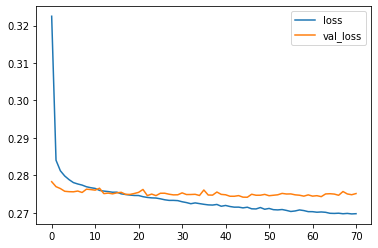

In [221]:
losses.plot()

In [222]:
from sklearn.metrics import classification_report,confusion_matrix

In [223]:
y_pred = model.predict_classes(X_test_scaled)

In [224]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15493
           1       0.88      1.00      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.94      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [225]:
confusion_matrix(y_test,y_pred)

array([[ 6773,  8720],
       [   58, 63655]], dtype=int64)

In [226]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           24000.00
term                   60.00
int_rate               13.11
installment           547.43
annual_inc          85000.00
                      ...   
4                       0.00
7                       0.00
8                       0.00
9                       0.00
earliest_cr_year     1991.00
Name: 304691, Length: 76, dtype: float64

In [227]:
new_customer = scaler.transform(new_customer.values.reshape(1,76))

In [228]:
df.iloc[random_ind]['loan_repaid']

1.0